<center>
  <h1> L‚Äôanalyse des sentiments avec NLP </h1>
</center>

# 1- installation et Importation des biblioth√®ques n√©cessaires

## 1-1 INSTALLATION

Dans le cadre de notre projet d'analyse des sentiments en utilisant le traitement du langage naturel (NLP), nous avons s√©lectionne plusieurs biblioth√®ques Python puissantes pour manipuler, visualiser et analyser les donn√©es. Ces bibliotheques sont essentielles pour le d√©veloppement d'un mod√®le d'analyse des sentiments robuste et la cr√©ation de visualisations informatives.

Nous utiliserons Pandas, Matplotlib, et Seaborn pour la manipulation et la visualisation des donn√©es, TensorFlow et PyTorch pour la mise en ≈ìuvre de mod√®les d'apprentissage automatique ,ainsi que NLTK et Transformers pour le traitement du langage naturel. De plus, des outils comme WordCloud nous aideront √† explorer visuellement les mots dans le texte.

1. **Seaborn :**
   - Visualisation de donn√©es bas√©e sur Matplotlib. Pour l'installer, utilisez : `!pip install seaborn --upgrade`

2. **TensorFlow :**
   - Biblioth√®que d'apprentissage automatique pour cr√©er, former et d√©ployer des mod√®les. Pour l'installer, utilisez : `!pip install tensorflow`

3. **Torch (PyTorch) :**
   - Biblioth√®que d'apprentissage automatique open-source pour la recherche et le d√©veloppement de mod√®les. Pour l'installer, utilisez : `!pip install torch`

4. **Flax :**
   - Biblioth√®que pour le d√©veloppement d'applications en intelligence artificielle bas√©e sur la programmation fonctionnelle. Pour l'installer, utilisez : `!pip install flax`

5. **Torch, torchvision, torchaudio:**
   - Composants de l'√©cosyst√®me PyTorch pour le traitement des donn√©es, la vision par ordinateur et l'audio. Pour les installer, utilisez : `!pip install torch torchvision torchaudio`

6. **WordCloud:**
   - Cr√©ation de nuages de mots √† partir de texte. Pour l'installer, utilisez : `!conda install -c conda-forge wordcloud`

7. **Pandas, Matplotlib, Seaborn:**
   - Biblioth√®ques pour la manipulation et la visualisation de donn√©es. Pandas est souvent d√©j√† inclus dans les environnements Python. Pour installer Matplotlib et Seaborn, utilisez : `!pip install matplotlib seaborn`

8. **NLTK (Natural Language Toolkit):**
   - Biblioth√®que de traitement du langage naturel. Pour l'installer, utilisez : `!pip install nltk`

9. **Transformers:**
   - Biblioth√®que pour l'utilisation de mod√®les pr√©-entra√Æn√©s. Pour l'installer, utilisez : `!pip install transformers`

10. **SciPy:**
    - Biblioth√®que scientifique pour les op√©rations math√©matiques et statistiques. Souvent inclus dans les distributions Python. Si n√©cessaire, installez avec : `!pip install scipy`

11. **tqdm:**
    - Barre de progression pour les boucles.
    Pour l'installer, utilisez : `!pip install tqdm`

12. **Re (module d'expressions r√©guli√®res en Python):**
    - Il est inclus dans la distribution standard de Python, aucune installation suppl√©mentaire n'est n√©cessaire.

13. **NumPy:**
    - Biblioth√®que pour le calcul num√©rique en Python. Souvent inclus dans les environnements Python. Si n√©cessaire, installez avec : 
    `!pip install numpy`


In [ ]:
# Installation des biblioth√®ques
!pip install seaborn --upgrade
!pip install tensorflow
!pip install torch
!pip install flax
!pip install torch torchvision torchaudio
!conda install -c conda-forge wordcloud
!pip install pandas matplotlib seaborn nltk transformers scipy tqdm
!pip install beautifulsoup4

## 1-2 IMPORTATION

In [1]:
# Import des biblioth√®ques pour la manipulation de donn√©es
import pandas as pd  # Pandas pour la manipulation de donn√©es tabulaires

# Import des biblioth√®ques pour la visualisation de donn√©es
import matplotlib.pyplot as plt  # Matplotlib pour la cr√©ation de graphiques
import seaborn as sns  # Seaborn pour des visualisations statistiques attrayantes

# Import des biblioth√®ques de traitement du langage naturel (NLP)
import nltk  # Biblioth√®que NLTK pour le traitement du langage naturel
from nltk.corpus import stopwords  # Liste de mots vides pour le pr√©traitement
from nltk.tokenize import word_tokenize  # Tokenisation de mots
import string  # Op√©rations de cha√Ænes de caract√®res

# T√©l√©chargement des ressources n√©cessaires de NLTK (comment√© car t√©l√©chargement uniquement n√©cessaire une fois)
# nltk.download('stopwords')  # T√©l√©chargement des mots vides
# nltk.download('punkt')  # T√©l√©chargement des mod√®les de tokenisation

# Import des composants de la biblioth√®que Transformers pour l'utilisation de mod√®les pr√©-entra√Æn√©s
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Transformers pour NLP

# Import de la fonction softmax pour normaliser les scores de classification
from scipy.special import softmax  # SciPy pour des op√©rations math√©matiques avanc√©es

# Import de la barre de progression pour les boucles (utile pour surveiller l'avancement)
from tqdm.notebook import tqdm  # TQDM pour une barre de progression interactive

import re  # Module d'expressions r√©guli√®res en Python pour la manipulation de texte

import numpy as np  # NumPy pour des op√©rations num√©riques avanc√©es

from wordcloud import WordCloud  # WordCloud pour la cr√©ation de nuages de mots

from bs4 import BeautifulSoup

# 2- Exploration des donn√©es

## 2-1 Charger la dataset :
D√©marrons notre exploration des d√©lices culinaires sur Amazon en chargeant le jeu de donn√©es. Il regroupe pr√®s de 500 000 avis jusqu'√† octobre 2012, offrant un aper√ßu d√©taill√© des produits, des utilisateurs, des notations, et des textes authentiques des critiques. Cette plong√©e va au-del√† des mets fins, incorporant des avis de diff√©rentes cat√©gories sur Amazon.

In [24]:
data = pd.read_csv('reviews.csv')

In [25]:
type(data)

pandas.core.frame.DataFrame

## 2-2 Aper√ßu des premi√®res lignes

La commande `data.head()` permet d'afficher les cinq premi√®res lignes de votre ensemble de donn√©es, offrant ainsi un aper√ßu rapide des informations contenues dans chaque colonne. Cela facilite la compr√©hension initiale de la structure des donn√©es que vous manipulez.

In [8]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [26]:
data.tail()

Id   ProductId          UserId              ProfileName  \
568448  568449  B001EO7N10  A1F6BHEYB7R6R7             James Braley   
568449  568450  B001EO7N10  A28KG5XORO54AY         Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z            pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH  Kathy A. Welch "katwel"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
568448                     0                       0      5  1308096000   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   

                                   Summary  \
568448       Very large ground spice jars.   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   

                                                     Text  
568448  My only complaint is that there's so much of i...  
568449  Great for sesame chicken..this is a good if no...  
568450  I'm disappointed with the flavor. The chocolat...  
568451  These stars are small, so you can give 10-15 o...  
568452  These are the BEST treats for training and rew...

## 2-3 Informations g√©n√©rales sur la dataset

In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


### Description des resultats :

La sortie de `data.info()` fournit des informations d√©taill√©es sur la structure de votre ensemble de donn√©es. Voici une description des r√©sultats :

- **Type de l'objet :** `pandas.core.frame.DataFrame`
- **Index :** RangeIndex, allant de 0 √† 568453, indiquant le nombre total d'entr√©es (lignes) dans l'ensemble de donn√©es.
- **Colonnes :** Il y a 10 colonnes au total.
- **Attributs et types de donn√©es :**
  - 'Id' est de type `int64` avec 568454 valeurs non nulles.
  - 'ProductId' est de type `object` (g√©n√©ralement une cha√Æne de caract√®res) avec 568454 valeurs non nulles.
  - 'UserId' est de type `object` avec 568454 valeurs non nulles.
  - 'ProfileName' est de type `object` avec 568428 valeurs non nulles (26 valeurs manquantes).
  - 'HelpfulnessNumerator' est de type `int64` avec 568454 valeurs non nulles.
  - 'HelpfulnessDenominator' est de type `int64` avec 568454 valeurs non nulles.
  - 'Score' est de type `int64` avec 568454 valeurs non nulles.
  - 'Time' est de type `int64` avec 568454 valeurs non nulles.
  - 'Summary' est de type `object` avec 568427 valeurs non nulles (27 valeurs manquantes).
  - 'Text' est de type `object` avec 568454 valeurs non nulles.

- **M√©moire utilis√©e :** Environ 43.4 MB.

- **Valeurs manquantes :** 'ProfileName' a 26 valeurs manquantes et 'Summary' a 27 valeurs manquantes.

Ces informations sont cruciales pour comprendre la composition de votre ensemble de donn√©es, y compris les types de donn√©es, la pr√©sence de valeurs manquantes, et la m√©moire utilis√©e par l'ensemble de donn√©es.

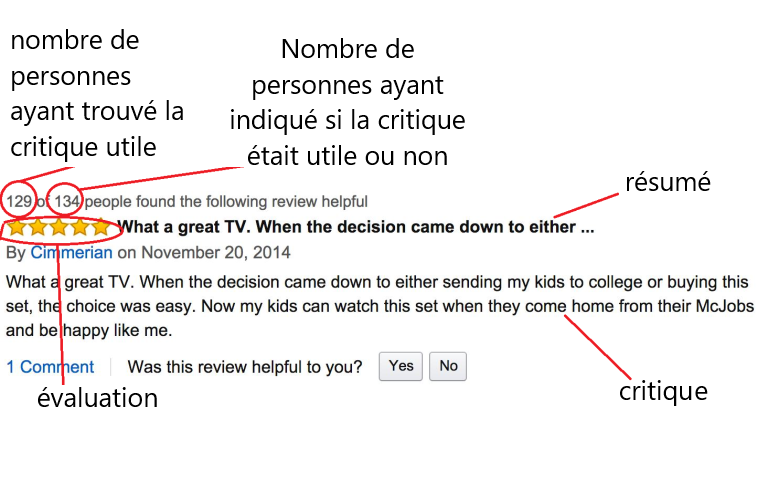

## 2-4 Statistiques descriptives pour les attributs num√©riques

In [30]:
data['Score'].describe()

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

### Description des resultats :
La sortie de la commande `data['Score'].describe()` fournit des statistiques descriptives sp√©cifiques pour la colonne 'Score' de votre ensemble de donn√©es. Voici une description des r√©sultats :

- **count :** Le nombre total d'observations dans la colonne 'Score' est de 568,454.

- **mean :** La moyenne (valeur moyenne) des scores dans la colonne 'Score' est d'environ 4.18.

- **std :** L'√©cart type, qui mesure la dispersion des scores autour de la moyenne, est d'environ 1.31.

- **min :** Le score minimum observ√© est 1.

- **25% :** Le premier quartile (Q1) est √† 4, ce qui signifie que 25% des scores sont √©gaux ou inf√©rieurs √† 4.

- **50% :** La m√©diane (Q2) est √† 5, ce qui indique que 50% des scores sont √©gaux ou inf√©rieurs √† 5.

- **75% :** Le troisi√®me quartile (Q3) est √† 5, ce qui signifie que 75% des scores sont √©gaux ou inf√©rieurs √† 5.

- **max :** Le score maximum observ√© est 5.

Ces statistiques fournissent un aper√ßu de la distribution des scores dans la colonne 'Score'. En l'occurrence, la plupart des scores semblent √™tre concentr√©s autour des valeurs √©lev√©es, avec une moyenne de 4.18 et une m√©diane de 5. Cela sugg√®re une tendance positive dans les √©valuations.

## 2-5 V√©rification des valeurs manquantes ou d'incoh√©rences

In [12]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

### Description des resultats :
La sortie que vous avez pr√©sent√©e est le r√©sultat de la commande `data.isnull().sum()` et indique le nombre de valeurs manquantes pour chaque colonne de votre ensemble de donn√©es. Voici une description des r√©sultats :

- **'Id':** Aucune valeur manquante dans la colonne 'Id'.
  
- **'ProductId':** Aucune valeur manquante dans la colonne 'ProductId'.
  
- **'UserId':** Aucune valeur manquante dans la colonne 'UserId'.
  
- **'ProfileName':** Il y a 26 valeurs manquantes dans la colonne 'ProfileName'.
  
- **'HelpfulnessNumerator':** Aucune valeur manquante dans la colonne 'HelpfulnessNumerator'.
  
- **'HelpfulnessDenominator':** Aucune valeur manquante dans la colonne 'HelpfulnessDenominator'.
  
- **'Score':** Aucune valeur manquante dans la colonne 'Score'.
  
- **'Time':** Aucune valeur manquante dans la colonne 'Time'.
  
- **'Summary':** Il y a 27 valeurs manquantes dans la colonne 'Summary'.
  
- **'Text':** Aucune valeur manquante dans la colonne 'Text'.

Ces r√©sultats vous indiquent les colonnes sp√©cifiques qui ont des valeurs manquantes et le nombre de ces valeurs manquantes. C'est important pour d√©cider comment traiter ces valeurs manquantes, que ce soit en les supprimant, en les rempla√ßant par des valeurs par d√©faut ou en utilisant d'autres m√©thodes de gestion des donn√©es manquantes en fonction du contexte de votre analyse.

## 2-6 V√©rifier les valeurs uniques dans chaque colonne

In [32]:
data.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218415
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

### Description des resultats :
La sortie de `data.nunique()` donne le nombre de valeurs uniques dans chaque colonne de votre ensemble de donn√©es. Voici une description des r√©sultats pour chaque colonne :

- **'Id':** 568454 valeurs uniques.
  
- **'ProductId':** 74258 valeurs uniques.
  
- **'UserId':** 256059 valeurs uniques.
  
- **'ProfileName':** 218415 valeurs uniques.
  
- **'HelpfulnessNumerator':** 231 valeurs uniques.
  
- **'HelpfulnessDenominator':** 234 valeurs uniques.
  
- **'Score':** 5 valeurs uniques (ce qui est coh√©rent avec le fait que les scores sont souvent √©valu√©s sur une √©chelle discr√®te).
  
- **'Time':** 3168 valeurs uniques.
  
- **'Summary':** 295742 valeurs uniques.
  
- **'Text':** 393579 valeurs uniques.

Ces informations peuvent √™tre utiles pour comprendre la diversit√© des donn√©es dans chaque colonne. Par exemple, dans la colonne 'Score', il y a seulement 5 valeurs uniques, indiquant probablement une √©chelle de notation restreinte. D'un autre c√¥t√©, dans la colonne 'Text', il y a 393579 valeurs uniques, soulignant la vari√©t√© des textes pr√©sents dans cet ensemble de donn√©es.

# 3- Pr√©traitement des donn√©es :

## 3-1 Supprimer les lignes en double


In [33]:
data.drop_duplicates(inplace=True)

## 3-2 G√©rer les valeurs manquantes

In [34]:
data.dropna(inplace=True)

# 4- Analyse Exploratoire des Donn√©es (EDA)

## 4-1 V√©rifier la distribution des scores 

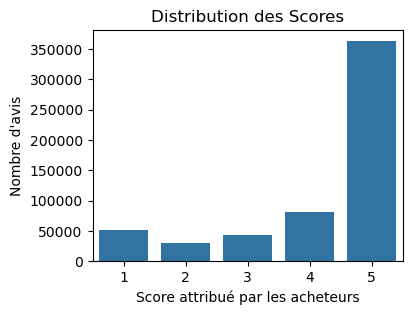

In [35]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Score', data=data)
plt.title('Distribution des Scores')
plt.xlabel('Score attribu√© par les acheteurs')
plt.ylabel('Nombre d\'avis')
plt.show()

### Expliquons les r√©sultats :

- **Score 5 :** Il y a 363,122 occurrences o√π le score est √©gal √† 5.
  
- **Score 4 :** Il y a 80,655 occurrences o√π le score est √©gal √† 4.

- **Score 1 :** Il y a 52,268 occurrences o√π le score est √©gal √† 1.

- **Score 3 :** Il y a 42,640 occurrences o√π le score est √©gal √† 3.

- **Score 2 :** Il y a 29,769 occurrences o√π le score est √©gal √† 2.

Ces r√©sultats donnent une vue d√©taill√©e de la distribution des scores dans votre ensemble de donn√©es. Par exemple, le score 5 est largement plus fr√©quent que les autres scores, sugg√©rant que la majorit√© des √©valuations sont positives. √Ä l'inverse, les scores 1, 2 et 3 sont moins fr√©quents, indiquant une proportion plus faible d'√©valuations n√©gatives ou neutres. Cette information peut √™tre utile pour comprendre la tendance g√©n√©rale des √©valuations dans votre ensemble de donn√©es.

## 4-2 Afficher quelques exemples de r√©sum√©s et de textes

In [23]:
print("Exemples de r√©sum√©s :")
print(data['Summary'].sample(2).values)

print("\nExemples de textes :")
data['Text'].sample(2).values

Exemples de r√©sum√©s :
['Excellent' 'OMH dog biscuits']

Exemples de textes :


array(["Great popcorn.  My family and I love watching movies and eating popcorn.  We consume more popcorn during the fall and winter months.  We received this popcorn and quickly made our first batch.  Wow.......It was great.  We made the mistake of not mixing everything together (oil, popcorn, and buttery salt).  That was our fault because we didn't read the instructions due to excitement.  But our first batch was still very good (a little salty because we added the salt mix last).  We made another batch two days later and it was awesome.  This is as close to theater popcorn made in our house ever.  It was really, really good.  Every kernell popped and it was a perfect balance.  We will NEVER, and I mean NEVER buy microwave or store popcorn again....We will be placing another order very soon.  I almost forgot to mention that we bought the 8oz bags.  That was enough for a large bowl which will feed 2-3 of us.  Can't wait to order another batch.....Enjoy",
       'I was very dissappoint

## 4-3 Calcul de la moyenne et de la m√©diane des scores dans les donn√©es

In [37]:
print("Average Score: ",np.mean(data.Score))
print("Median Score: ",np.median(data.Score))

Average Score:  4.183296651483723
Median Score:  5.0


Comme nous pouvons l'observer, la majorit√© des scores sont √©gaux √† 4 et 5, avec une moyenne de 4,18. En raison de la distribution tr√®s inclin√©e vers la gauche, nous ferons une pr√©diction binaire. Nous pouvons consid√©rer qu'un avis n√©gatif aura un score entre 1 et 3, et un avis positif aura un score √©gal √† 4 ou 5.

## 4-4 Distribution des avis positifs et n√©gatifs

In [38]:
# Cr√©er des conditions pour chaque cat√©gorie
positive_condition = data['Score'] > 3
neutral_condition = data['Score'] == 3
negative_condition = data['Score'] < 3

# Mettre √† jour la colonne 'Sentiment' en utilisant les conditions
data['Sentiment'] = np.select([positive_condition, neutral_condition, negative_condition], 
                               ['POSITIF', 'NEUTRE', 'NEGATIF'], 
                               default='NEUTRE')

Apr√®s avoir cr√©√© une nouvelle variable appel√©e Sentiment, d√©finie comme N√âGATIVE lorsque le score est compris entre 1 et 2, 3 c'est neutre et POSITIVE lorsque le score est √©gal √† 4 ou 5, nous obtenons cette nouvelle distribution :

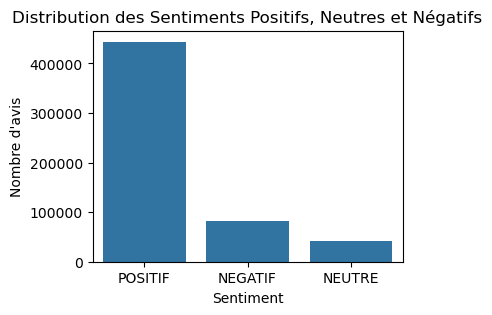

In [39]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
sns.countplot(x='Sentiment', data=data, ax=ax)
ax.set_title('Distribution des Sentiments Positifs, Neutres et N√©gatifs')
ax.set_ylabel("Nombre d'avis")
plt.show()

Les r√©sultats du graphique montrent que le nombre d'avis positifs ("POSITIF") est le plus √©lev√©, totalisant 443,756 occurrences. Les avis n√©gatifs ("NEGATIF") s'√©l√®vent √† 82,007, tandis que les avis neutres ("NEUTRE") sont au nombre de 42,638. Cette r√©partition permet une visualisation claire de la distribution des sentiments dans l'ensemble de donn√©es.

# 5- Traitement du texte

### ON VA TRAVAILLER SUR 100000 LIGNE

In [16]:
data = data.head(100000)

le code suivant r√©alise les actions suivantes :

1. G√®re les valeurs manquantes en rempla√ßant par des cha√Ænes vides.
2. Applique un processus de pr√©traitement au texte dans les colonnes 'Summary' et 'Text', supprimant la ponctuation, mettant en minuscules et supprimant les stopwords.

In [56]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # V√©rifier si le texte ressemble √† une URL
    if re.match(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text):
        # Si c'est une URL, vous pouvez utiliser une biblioth√®que comme requests pour r√©cup√©rer le contenu
        # text = r√©cup√©rer_contenu_de_lurl(text)
        pass
    else:
        # Supprimer les balises HTML avec BeautifulSoup
        text = BeautifulSoup(text, 'html.parser').get_text()

    # Supprimer les caract√®res non alphab√©tiques
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convertir le texte en minuscules
    text = text.lower()

    # Supprimer les stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

tqdm.pandas()
data['Processed_Text'] = data['Text'].progress_apply(preprocess_text)

# Afficher les premi√®res lignes apr√®s le pr√©traitement
data.head()

  0%|          | 0/100000 [00:00<?, ?it/s]

C:\Users\BYDEVMAR\AppData\Local\Temp\ipykernel_6660\2932768173.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

  Sentiment                                     Processed_Text  
0   POSITIF  bought several vitality canned dog food produc...  
1   NEGATIF  product arrived labeled jumbo salted peanutsth...  
2   POSITIF  confection around centuries light pillowy citr...  
3   NEGATIF  looking secret ingredient robitussin believe f...  
4   POSITIF  great taffy great price wide assortment yummy ...

# 5- Utilisation de mod√®le pr√©-entra√Æn√© Roberta
## 5-1 Initialisation du Mod√®le RoBERTa pour l'Analyse de Sentiments

In [17]:
# D√©finition du mod√®le pr√©-entra√Æn√© √† utiliser (dans ce cas, le mod√®le de sentiment bas√© sur RoBERTa pour Twitter)
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Initialisation du tokenizer avec le mod√®le pr√©-entra√Æn√©
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Initialisation du mod√®le de classification de s√©quence bas√© sur RoBERTa pour Twitter
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

## 5-2 Fonction d'√âvaluation des Scores de RoBERTa pour l'Analyse de Sentiments
Cette fonction, nomm√©e "roberta_scores", prend en entr√©e un exemple de texte, l'encode √† l'aide du tokenizer associ√© au mod√®le RoBERTa pr√©-entra√Æn√© pour l'analyse de sentiments sur Twitter, puis utilise le mod√®le pour obtenir des scores de sentiment. Les scores sont ensuite normalis√©s avec la fonction softmax et renvoy√©s sous forme de dictionnaire comprenant les probabilit√©s associ√©es aux classes n√©gative, neutre et positive.

In [23]:
def roberta_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits.detach().numpy()
    scores = softmax(scores, axis=1)
    scores_dict = {
        'rta_neg': scores[0, 0],
        'rta_neu': scores[0, 1],
        'rta_pos': scores[0, 2]
    }
    return scores_dict

## 5-3 Analyse de Sentiments avec RoBERTa sur l'Ensemble de Donn√©es
Ce code parcourt chaque ligne de l'ensemble de donn√©es 'data', r√©cup√®re le texte et l'identifiant associ√©, puis utilise la fonction 'roberta_scores' pour effectuer une analyse de sentiment avec le mod√®le RoBERTa pr√©-entra√Æn√©. Les r√©sultats de RoBERTa sont ensuite stock√©s dans un dictionnaire 'res', associant chaque identifiant √† ses scores de sentiment correspondants. En cas d'erreur de type RuntimeError, un message est affich√© indiquant l'√©chec de l'analyse pour un identifiant sp√©cifique.

In [26]:
res = {}
# Diviser les donn√©es en 10 parties
num_parts = 10
part_size = len(data) // num_parts
for part in range(num_parts):
    start_idx = part * part_size
    end_idx = min((part + 1) * part_size, len(data))
    part_data = data.iloc[start_idx:end_idx]

    for i, row in tqdm(part_data.iterrows(), total=len(part_data)):
        try:
            text = row['Processed_Text']  
            my_id = row['Id']
            # Effectuer une analyse de sentiment avec RoBERTa
            roberta_result = roberta_scores(text)
            # Conserver uniquement les r√©sultats de RoBERTa
            res[my_id] = roberta_result
        except Exception as e:
            print(f'Probl√®me dans ID {my_id} : {e}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Probl√®me dans ID 540 : The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]
Probl√®me dans ID 1321 : The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]
Probl√®me dans ID 1498 : The expanded size of the tensor (564) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 564].  Tensor sizes: [1, 514]
Probl√®me dans ID 2248 : The expanded size of the tensor (619) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 619].  Tensor sizes: [1, 514]
Probl√®me dans ID 8077 : The expanded size of the tensor (582) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 582].  Tensor sizes: [1, 514]
Probl√®me dans ID 8757 : The expanded size of the tensor (999) must match the existing size (514) at non-singleton d

  0%|          | 0/10000 [00:00<?, ?it/s]

Probl√®me dans ID 10005 : The expanded size of the tensor (1163) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1163].  Tensor sizes: [1, 514]
Probl√®me dans ID 18192 : The expanded size of the tensor (604) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 604].  Tensor sizes: [1, 514]
Probl√®me dans ID 19568 : The expanded size of the tensor (737) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 737].  Tensor sizes: [1, 514]
Probl√®me dans ID 19828 : The expanded size of the tensor (578) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 578].  Tensor sizes: [1, 514]


  0%|          | 0/10000 [00:00<?, ?it/s]

Probl√®me dans ID 20420 : The expanded size of the tensor (897) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 897].  Tensor sizes: [1, 514]
Probl√®me dans ID 22479 : The expanded size of the tensor (525) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 525].  Tensor sizes: [1, 514]
Probl√®me dans ID 22484 : The expanded size of the tensor (535) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 535].  Tensor sizes: [1, 514]
Probl√®me dans ID 26115 : The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]
Probl√®me dans ID 27541 : The expanded size of the tensor (688) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 688].  Tensor sizes: [1, 514]
Probl√®me dans ID 27585 : The expanded size of the tensor (594) must match the existing size (514) at non-sing

  0%|          | 0/10000 [00:00<?, ?it/s]

Probl√®me dans ID 37506 : The expanded size of the tensor (700) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 700].  Tensor sizes: [1, 514]
Probl√®me dans ID 38776 : The expanded size of the tensor (588) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 588].  Tensor sizes: [1, 514]
Probl√®me dans ID 39098 : The expanded size of the tensor (785) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 785].  Tensor sizes: [1, 514]


  0%|          | 0/10000 [00:00<?, ?it/s]

Probl√®me dans ID 41068 : index out of range in self
Probl√®me dans ID 41623 : The expanded size of the tensor (704) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 704].  Tensor sizes: [1, 514]
Probl√®me dans ID 42251 : The expanded size of the tensor (529) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 529].  Tensor sizes: [1, 514]
Probl√®me dans ID 42656 : The expanded size of the tensor (624) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 624].  Tensor sizes: [1, 514]
Probl√®me dans ID 42889 : The expanded size of the tensor (617) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 617].  Tensor sizes: [1, 514]
Probl√®me dans ID 44204 : The expanded size of the tensor (546) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 546].  Tensor sizes: [1, 514]
Probl√®me dans ID 44416 : The expanded size of the tensor

  0%|          | 0/10000 [00:00<?, ?it/s]

Probl√®me dans ID 50686 : The expanded size of the tensor (556) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 556].  Tensor sizes: [1, 514]
Probl√®me dans ID 50910 : The expanded size of the tensor (536) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 536].  Tensor sizes: [1, 514]
Probl√®me dans ID 51901 : The expanded size of the tensor (700) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 700].  Tensor sizes: [1, 514]
Probl√®me dans ID 52278 : The expanded size of the tensor (529) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 529].  Tensor sizes: [1, 514]
Probl√®me dans ID 54230 : The expanded size of the tensor (585) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 585].  Tensor sizes: [1, 514]
Probl√®me dans ID 54559 : index out of range in self
Probl√®me dans ID 54710 : The expanded size of the tensor

  0%|          | 0/10000 [00:00<?, ?it/s]

Probl√®me dans ID 60395 : The expanded size of the tensor (955) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 955].  Tensor sizes: [1, 514]
Probl√®me dans ID 60995 : The expanded size of the tensor (556) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 556].  Tensor sizes: [1, 514]
Probl√®me dans ID 63158 : The expanded size of the tensor (795) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 795].  Tensor sizes: [1, 514]
Probl√®me dans ID 63738 : The expanded size of the tensor (799) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 799].  Tensor sizes: [1, 514]
Probl√®me dans ID 66311 : The expanded size of the tensor (684) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 684].  Tensor sizes: [1, 514]
Probl√®me dans ID 66877 : The expanded size of the tensor (558) must match the existing size (514) at non-sing

  0%|          | 0/10000 [00:00<?, ?it/s]

Probl√®me dans ID 70240 : The expanded size of the tensor (600) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 600].  Tensor sizes: [1, 514]
Probl√®me dans ID 72705 : The expanded size of the tensor (805) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 805].  Tensor sizes: [1, 514]
Probl√®me dans ID 72921 : The expanded size of the tensor (618) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 618].  Tensor sizes: [1, 514]
Probl√®me dans ID 74281 : The expanded size of the tensor (535) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 535].  Tensor sizes: [1, 514]
Probl√®me dans ID 75290 : The expanded size of the tensor (594) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 594].  Tensor sizes: [1, 514]
Probl√®me dans ID 75354 : The expanded size of the tensor (564) must match the existing size (514) at non-sing

  0%|          | 0/10000 [00:00<?, ?it/s]

Probl√®me dans ID 81797 : The expanded size of the tensor (656) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 656].  Tensor sizes: [1, 514]
Probl√®me dans ID 87032 : The expanded size of the tensor (724) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 724].  Tensor sizes: [1, 514]
Probl√®me dans ID 87878 : The expanded size of the tensor (656) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 656].  Tensor sizes: [1, 514]
Probl√®me dans ID 89634 : The expanded size of the tensor (641) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 641].  Tensor sizes: [1, 514]
Probl√®me dans ID 89818 : The expanded size of the tensor (530) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 530].  Tensor sizes: [1, 514]


  0%|          | 0/10000 [00:00<?, ?it/s]

Probl√®me dans ID 93483 : The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]
Probl√®me dans ID 93797 : The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]
Probl√®me dans ID 94382 : The expanded size of the tensor (752) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 752].  Tensor sizes: [1, 514]
Probl√®me dans ID 95321 : The expanded size of the tensor (537) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 537].  Tensor sizes: [1, 514]
Probl√®me dans ID 97611 : The expanded size of the tensor (1030) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1030].  Tensor sizes: [1, 514]
Probl√®me dans ID 99304 : The expanded size of the tensor (738) must match the existing size (514) at non-si

In [29]:
# Affichage du dictionnaire r√©sultant de l'analyse de sentiment avec RoBERTa
res


{1: {'rta_neg': 0.007874446, 'rta_neu': 0.08880092, 'rta_pos': 0.90332466},
 2: {'rta_neg': 0.08493852, 'rta_neu': 0.8423908, 'rta_pos': 0.07267068},
 3: {'rta_neg': 0.0046725716, 'rta_neu': 0.13230933, 'rta_pos': 0.86301816},
 4: {'rta_neg': 0.0055126064, 'rta_neu': 0.34244046, 'rta_pos': 0.65204686},
 5: {'rta_neg': 0.001966447, 'rta_neu': 0.012693261, 'rta_pos': 0.9853403},
 6: {'rta_neg': 0.0023043938, 'rta_neu': 0.048075844, 'rta_pos': 0.9496198},
 7: {'rta_neg': 0.0020632278, 'rta_neu': 0.012395268, 'rta_pos': 0.9855415},
 8: {'rta_neg': 0.0017318623, 'rta_neu': 0.014302323, 'rta_pos': 0.9839659},
 9: {'rta_neg': 0.0155409295, 'rta_neu': 0.67226887, 'rta_pos': 0.31219015},
 10: {'rta_neg': 0.008339728, 'rta_neu': 0.20592855, 'rta_pos': 0.7857317},
 11: {'rta_neg': 0.14542769, 'rta_neu': 0.32045478, 'rta_pos': 0.5341175},
 12: {'rta_neg': 0.27985084, 'rta_neu': 0.65204746, 'rta_pos': 0.06810173},
 13: {'rta_neg': 0.12532794, 'rta_neu': 0.570371, 'rta_pos': 0.30430102},
 14: {'rta_

## 5-4 Transformation et Fusion des R√©sultats d'Analyse de Sentiments avec les Donn√©es d'Origine

In [28]:
df = pd.DataFrame(res).T
df = df.reset_index().rename(columns={'index': 'Id'})
df = df.merge(data, how='left')
df
df.to_csv('nlp_results.csv', index=False)

Dans cette phase, les r√©sultats de l‚Äôanalyse de sentiments avec RoBERTa sont
int√©gr√©s aux donn√©es d‚Äôorigine. Un DataFrame, df, est cr√©√© √† partir des scores de
sentiment associ√©s √† chaque identifiant. Apr√®s transposition et r√©initialisation, df
est fusionn√© avec l‚Äôensemble de donn√©es initial (data) bas√© sur la colonne ‚ÄôId‚Äô. Cette
fusion permet de combiner les scores de sentiment RoBERTa avec les informations
d‚Äôorigine pour chaque entr√©e. Le DataFrame final est export√© en CSV sous le nom
nlp_results.csv, facilitant ainsi l‚Äôexploration ult√©rieure des r√©sultats d‚Äôanalyse de
sentiments

# 6- R√©sultats

## 6-1 Charger les donn√©es √† partir du fichier CSV

In [3]:
l_df = pd.read_csv('nlp_result.csv')
l_df.head()

Id   rta_neg   rta_neu   rta_pos   ProductId          UserId  \
0   1  0.007874  0.088801  0.903325  B001E4KFG0  A3SGXH7AUHU8GW   
1   2  0.084939  0.842391  0.072671  B00813GRG4  A1D87F6ZCVE5NK   
2   3  0.004673  0.132309  0.863018  B000LQOCH0   ABXLMWJIXXAIN   
3   4  0.005513  0.342440  0.652047  B000UA0QIQ  A395BORC6FGVXV   
4   5  0.001966  0.012693  0.985340  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text Sentiment  \
0  I have bought several of the Vitality canned d...   POSITIF   
1  Product arrived labeled as Jumbo Salted Peanut...   NEGATIF   
2  This is a confection that has been around a fe...   POSITIF   
3  If you are looking for the secret ingredient i...   NEGATIF   
4  Great taffy at a great price.  There was a wid...   POSITIF   

                                      Processed_Text  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanutsth...  
2  confection around centuries light pillowy citr...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...

## 6-3 Distribution des Sentiments Pr√©dits par ROBERTA

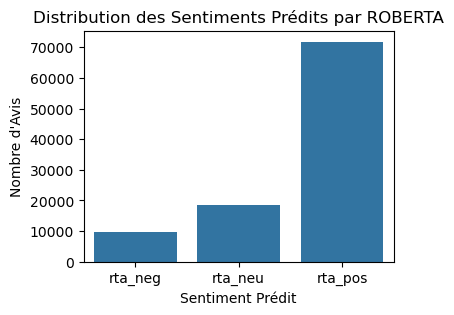

In [9]:
# Cr√©er une colonne 'Sentiment' bas√©e sur les probabilit√©s pr√©dites
l_df['Sentiment'] = l_df[['rta_neg', 'rta_neu', 'rta_pos']].idxmax(axis=1)

# Plot
plt.figure(figsize=(4, 3))
sns.countplot(x='Sentiment', data=l_df, order=['rta_neg', 'rta_neu', 'rta_pos'])
plt.title('Distribution des Sentiments Pr√©dits par ROBERTA')
plt.xlabel('Sentiment Pr√©dit')
plt.ylabel('Nombre d\'Avis')
plt.show()

La distribution des sentiments pr√©dits par ROBERTA sur l'ensemble de vos avis est la suivante :

- Sentiment Positif (rta_pos) : 71,827 occurrences
- Sentiment Neutre (rta_neu) : 18,492 occurrences
- Sentiment N√©gatif (rta_neg) : 9,607 occurrences

Cela indique que la majorit√© des avis ont √©t√© pr√©dits comme ayant un sentiment positif par ROBERTA, suivi par les avis neutres, et une proportion plus faible d'avis n√©gatifs. Cette r√©partition peut √™tre utile pour comprendre la tendance g√©n√©rale des sentiments dans votre ensemble de donn√©es analys√© par le mod√®le ROBERTA.

## 6-4 Distribution des Sentiments ROBERTA selon les Scores

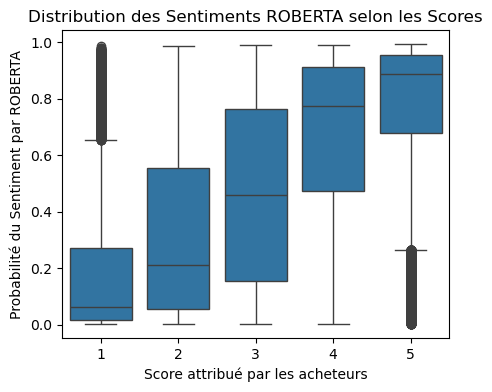

In [10]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='Score', y='rta_pos', data=l_df)
plt.title('Distribution des Sentiments ROBERTA selon les Scores')
plt.xlabel('Score attribu√© par les acheteurs')
plt.ylabel('Probabilit√© du Sentiment')
plt.show()

On Constate que la distribution des pr√©dictions de sentiment g√©n√©r√©es par le mod√®le ROBERTA, class√©es selon les scores attribu√©s par les acheteurs. Les scores plus √©lev√©s tendent √† avoir des pr√©dictions de sentiment positif plus √©lev√©es, tandis que les scores plus bas montrent une variabilit√© plus large des pr√©dictions. Ces informations offrent un aper√ßu de la corr√©lation entre les √©valuations des acheteurs et les sentiments pr√©dits par le mod√®le.

## 6-5 Diagramme circulaire des proportions de sentiments

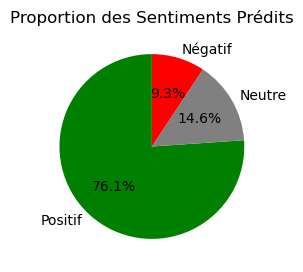

In [23]:
plt.figure(figsize=(4, 3))
nombre_sentiments = [len(l_df[l_df['rta_pos'] >= 0.5]),
                    len(l_df[(l_df['rta_neu'] >= 0.5) & (l_df['rta_pos'] < 0.5)]),
                    len(l_df[l_df['rta_neg'] >= 0.5])]

etiquettes = ['Positif', 'Neutre', 'N√©gatif']
couleurs = ['green', 'gray', 'red']

plt.pie(nombre_sentiments, labels=etiquettes, colors=couleurs, autopct='%1.1f%%', startangle=90)
plt.title('Proportion des Sentiments Pr√©dits')
plt.show()


La majorit√© des pr√©dictions sont positives, repr√©sentant 76% du total. Les pr√©dictions neutres sont moins fr√©quentes, constituant seulement 14.6%, tandis que les pr√©dictions n√©gatives repr√©sentent 9.3% de l'ensemble des observations. Ces proportions offrent un aper√ßu clair de la pr√©f√©rence du mod√®le pour des sentiments majoritairement positifs.

C:\Users\BYDEVMAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x500 with 0 Axes>

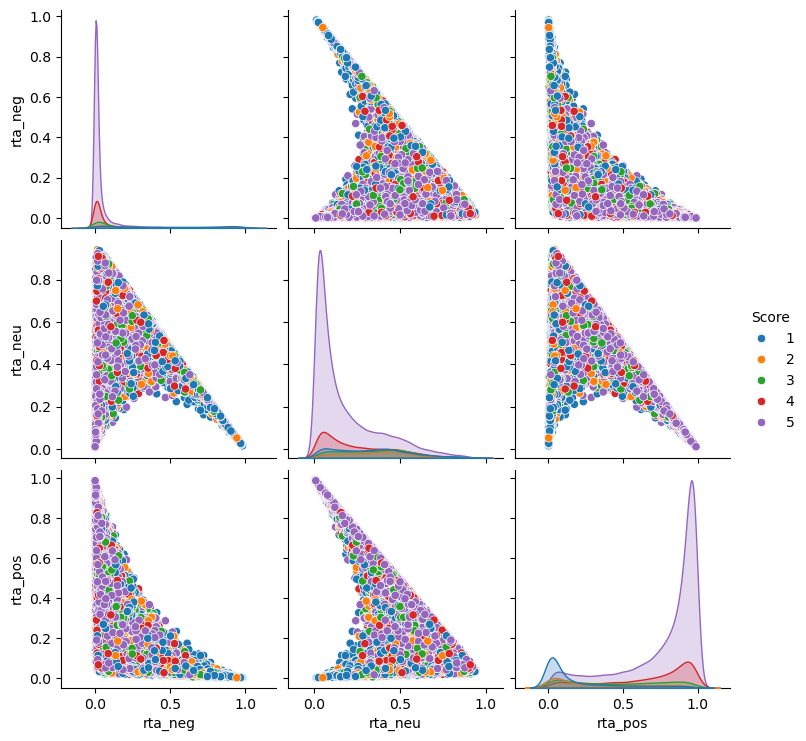

In [33]:
plt.figure(figsize=(8, 5))
sns.pairplot(data=l_df,
             vars=['rta_neg', 'rta_neu', 'rta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## 6-6 Nuage de mots des avis positifs et n√©gatifs

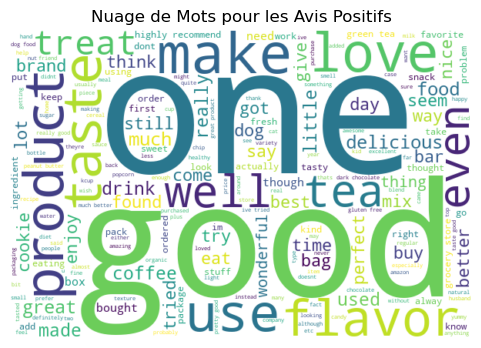

In [12]:
# Filtrer les textes pr√©dits comme positifs
texte_positif = ' '.join(l_df[l_df['rta_pos'] >= 0.5]['Processed_Text'])

# G√©n√©rer le nuage de mots pour les textes positifs
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(texte_positif)

# Afficher le nuage de mots
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots pour les Avis Positifs')
plt.show()

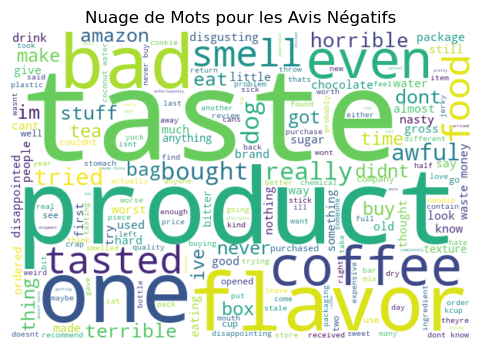

In [25]:
# Filtrer les textes pr√©dits comme n√©gatifs
texte_negatif = ' '.join(l_df[l_df['rta_neg'] >= 0.9]['Processed_Text'])

# G√©n√©rer le nuage de mots pour les textes n√©gatifs
wordcloud_negatif = WordCloud(width=600, height=400, background_color='white').generate(texte_negatif)

# Afficher le nuage de mots pour les textes n√©gatifs
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots pour les Avis N√©gatifs')
plt.show()

# 7- Points Faibles

### Analyse des textes mal class√©s

M√™me si la plupart des textes sont correctement class√©s, il y aura toujours quelques phrases ambigu√´s et mal class√©es. Parfois, elles peuvent sembler positives, mais en r√©alit√©, elles sont n√©gatives. De la m√™me mani√®re, des phrases positives peuvent parfois sembler n√©gatives. √Ä pr√©sent, explorons quelques textes que nos mod√®les classent incorrectement.

In [68]:
l_df.query("Score == 1").sort_values("rta_pos" , ascending=False)['Text'].values[0]

"I was excited to find this and read the great reviews.  I ordered it at $15+ from Amazon, and it does work and taste great in our large school popcorn maker. HOWEVER, it's offered for $3.48 at our local food warehouse!!  Wow, Amazon is really making some money off this one.  Shop local before you buy this overpriced wonder."

**ICI La critique est n√©gatif. La personne exprime d'abord de l'enthousiasme, mais devient insatisfaite en d√©couvrant une diff√©rence de prix significative entre l'achat sur Amazon et l'entrep√¥t alimentaire local. La d√©claration "Wow, Amazon se fait vraiment de l'argent avec celui-ci" et la recommandation de "Magasiner localement avant d'acheter cette merveille hors de prix" indiquent un sentiment n√©gatif.**

In [72]:
l_df.query("Score == 5").sort_values("rta_neg" , ascending=False)['Text'].values[1]

"I've eaten other brands of unsalted potato chips and they've always been terrible.  I didn't expect much when I bought these.  But after I tasted them I was amazed.  I have never enjoyed unsalted potato chips before these.  They have a natural potato flavor with thick, crunchy chips.  The only bad thing is the bag is a pain to open.  Use scissors and save yourself the aggravation."

**Le sentiment dans ce texte est positif. La personne avait initialement des attentes basses en se basant sur des exp√©riences pass√©es avec d'autres marques de chips de pommes de terre non sal√©es, mais a √©t√© agr√©ablement surprise et √©merveill√©e apr√®s avoir essay√© celles-ci. Les aspects positifs mentionn√©s comprennent une saveur naturelle de pomme de terre avec des chips √©paisses et croquantes. Cependant, un probl√®me mineur est not√© avec la difficult√© d'ouvrir le sac, et la suggestion est donn√©e d'utiliser des ciseaux pour √©viter l'aggravation. Dans l'ensemble, le ton est favorable.**

# 8- Conclusion

En conclusion, ce projet d'analyse de sentiment a utilis√© une approche compl√®te pour examiner les sentiments exprim√©s dans un vaste ensemble de critiques Amazon. Depuis l'installation des biblioth√®ques Python essentielles jusqu'√† l'int√©gration du mod√®le RoBERTa, le parcours a permis de comprendre la structure du jeu de donn√©es et de pr√©dire les sentiments avec une confiance √©lev√©e, en mettant en lumi√®re une tendance positive dominante.

### R√©flexion :
Cette analyse a mis en √©vidence des limitations, notamment des d√©fis li√©s √† la classification erron√©e de d√©clarations ambigu√´s. Les critiques mal class√©es ont fourni des enseignements importants sur les limites du mod√®le, soulignant la n√©cessit√© d'une approche plus nuanc√©e. De plus, il est crucial de noter que le traitement de 100 000 lignes sur mon ordinateur personnel avec un processeur central (CPU) a pris environ 10 heures, repr√©sentant seulement 1/5 de la dataframe compl√®te. Cette consid√©ration souligne la n√©cessit√© d'optimiser les performances pour g√©rer des ensembles de donn√©es plus vastes.

### Am√©lioration :
Pour am√©liorer le mod√®le, des ajustements peuvent √™tre apport√©s pour mieux traiter des expressions de sentiment complexes. Explorer des strat√©gies pour g√©rer des jeux de donn√©es plus vastes et diversifi√©s pourrait renforcer la g√©n√©ralisation du mod√®le dans diff√©rents contextes.

En r√©sum√©, bien que ce projet ait r√©ussi √† explorer les nuances des sentiments dans les critiques Amazon, une r√©flexion continue et des am√©liorations it√©ratives sont n√©cessaires pour perfectionner la pr√©cision du mod√®le dans des sc√©narios vari√©s.

# 9- Ressources


- Xinyue Zhao et Yuandong Sun. (2022). "Amazon Fine Food Reviews with BERT Model." Procedia Computer Science, Volume 208, Pages 401-406. DOI: [10.1016/j.procs.2022.10.056](https://doi.org/10.1016/j.procs.2022.10.056). Elsevier B.V. Available online at: [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S1877050922014971).

- Hugging Face. (2022). Documentation Transformers - Mod√®le RoBERTa. https://huggingface.co/docs/transformers/model_doc/roberta

- Mulla, R. (2022). Projet d'analyse de sentiment en Python avec NLTK et ü§ó Transformers. Classifiez les critiques d'Amazon !! [Vid√©o]. YouTube. https://www.youtube.com/watch?v=QpzMWQvxXWk

- Robikscube. (2022). Analyse de sentiment en Python ü§ó [Didacticiel sur YouTube]. Kaggle. https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

<center>
  <h1> Thanks For Reading! </h1>
</center>